In [1]:
import os

os.environ["JAX_ENABLE_X64"] = "true"     
os.environ["JAX_PLATFORMS"] = "cuda"       

from jax import config
config.update("jax_enable_x64", True)

import jax
import jax.numpy as jnp

print("x64 enabled:", config.read("jax_enable_x64"))
print("default dtype:", jnp.ones(()).dtype)
print("devices:", jax.devices())

x64 enabled: True
default dtype: float64
devices: [CudaDevice(id=0), CudaDevice(id=1)]


In [2]:
import os, sys
os.chdir("/home/agnes/Skyclean")       # repo root
sys.path.insert(0, os.getcwd())

from skyclean.silc.ilc import ProduceSILC
from skyclean.silc.ilc import SILCTools
from skyclean.silc.file_templates import FileTemplates
from skyclean.silc.pipeline import Pipeline
from skyclean.silc.power_spec import MapAlmConverter, PowerSpectrumTT
from skyclean.silc.map_tools import SamplingConverters  
from skyclean.silc.download import DownloadData

In [3]:
directory = "/Scratch/agnes/data" 
ft = FileTemplates(directory).file_templates

# INPUT wavelet coeff template (uses {comp}, {frequency}, {scale}, {realisation:05d}, {lmax}, {lam})
file_template = ft.get("wavelet_coeffs") or ft["wavelet_c_j"]

# OUTPUT templates expected by ILC_wav_coeff_maps_MP (use {component}, {extract_comp}, {realisation})
output_templates = {
    "doubled_maps":           ft["doubled_maps"],
    "covariance_matrices":    ft["covariance_matrices"],
    "weight_vector_matrices": ft["weight_vector_matrices"],
    "ilc_maps":               ft["ilc_maps"],
    "trimmed_maps":           ft["trimmed_maps"],
    "ilc_synth":              ft["ilc_synth"],
    "ilc_spectrum":           ft.get("ilc_spectrum"),  
    "scaling_coeffs":         ft["scaling_coeffs"], 
}

In [4]:
pipe = Pipeline(
    components=["cmb","sync","noise","tsz"],
    wavelet_components=["cfn"],
    ilc_components=["cmb"],
    frequencies=["030","044","070","100","143","217","353","545","857"],
    realisations=1, 
    start_realisation=0,
    lmax=64,
    N_directions=1,
    lam=2.0,
    method="jax_cuda", 
    visualise=True,
    save_ilc_intermediates=False,
    overwrite=False,
    directory="/Scratch/agnes/data",
    constraint=True,
)

In [5]:
pipe.step_download()

--- STARTING DATA DOWNLOAD ---
File /Scratch/agnes/data/CMB_realisations/sync_f030.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f044.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f070.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f100.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f143.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f217.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f353.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f545.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/sync_f857.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f030.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f044

In [6]:
pipe.step_process()

--- PROCESSING CFNs AND TOTAL MAP CFN ---
CFN map at 030 GHz for realisation 0 already exists. Skipping processing.
CFN map at 044 GHz for realisation 0 already exists. Skipping processing.
CFN map at 070 GHz for realisation 0 already exists. Skipping processing.
CFN map at 100 GHz for realisation 0 already exists. Skipping processing.
CFN map at 143 GHz for realisation 0 already exists. Skipping processing.
CFN map at 217 GHz for realisation 0 already exists. Skipping processing.
CFN map at 353 GHz for realisation 0 already exists. Skipping processing.
CFN map at 545 GHz for realisation 0 already exists. Skipping processing.
CFN map at 857 GHz for realisation 0 already exists. Skipping processing.


In [7]:
pipe.step_wavelets()

--- PRODUCING WAVELET TRANSFORMS ---
Wavelet coefficients for cfn at 030 GHz for realisation 0 already exist. Skipping generation.
Wavelet transform for cfn at 030 GHz for realisation 0 saved.
Wavelet coefficients for cfn at 044 GHz for realisation 0 already exist. Skipping generation.
Wavelet transform for cfn at 044 GHz for realisation 0 saved.
Wavelet coefficients for cfn at 070 GHz for realisation 0 already exist. Skipping generation.
Wavelet transform for cfn at 070 GHz for realisation 0 saved.
Wavelet coefficients for cfn at 100 GHz for realisation 0 already exist. Skipping generation.
Wavelet transform for cfn at 100 GHz for realisation 0 saved.
Wavelet coefficients for cfn at 143 GHz for realisation 0 already exist. Skipping generation.
Wavelet transform for cfn at 143 GHz for realisation 0 saved.
Wavelet coefficients for cfn at 217 GHz for realisation 0 already exist. Skipping generation.
Wavelet transform for cfn at 217 GHz for realisation 0 saved.
Wavelet coefficients for cf

--- RUNNING ILC (new functional API) ---


[DEBUG] cmb: raw vec=[8.52574679e-13 8.52574679e-13 8.52574679e-13 8.52574679e-13
 8.52574679e-13 8.52574679e-13 8.52574679e-13 8.52574679e-13
 8.52574679e-13], norm=2.5577240361436504e-12
[DEBUG] cmb: stored reference vector=[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]
[DEBUG] tsz: raw vec=[-3.23651484e-06 -3.13890689e-06 -2.88553727e-06 -2.43590623e-06
 -1.68110880e-06  9.86628234e-08  3.70779525e-06  5.17926616e-04
  4.18327288e-05], norm=0.0005196625138847971
[DEBUG] tsz: stored reference vector=[-6.22810912e-03 -6.04027962e-03 -5.55271390e-03 -4.68747728e-03
 -3.23500109e-03  1.89859420e-04  7.13500619e-03  9.96659567e-01
  8.04998007e-02]
[DEBUG] sync: raw vec=[7.99385964e-05 2.18012957e-05 5.92539891e-06 2.22432001e-06
 1.02302813e-06 5.22711397e-07 5.45907528e-07 1.01322671e-04
 6.61846878e-05], norm=0.00014681228847839478
[DEBUG] sync: stored reference vector=[0.54449527 0.14849776 0.04036037 0.01515078 0.00696827 0.0035

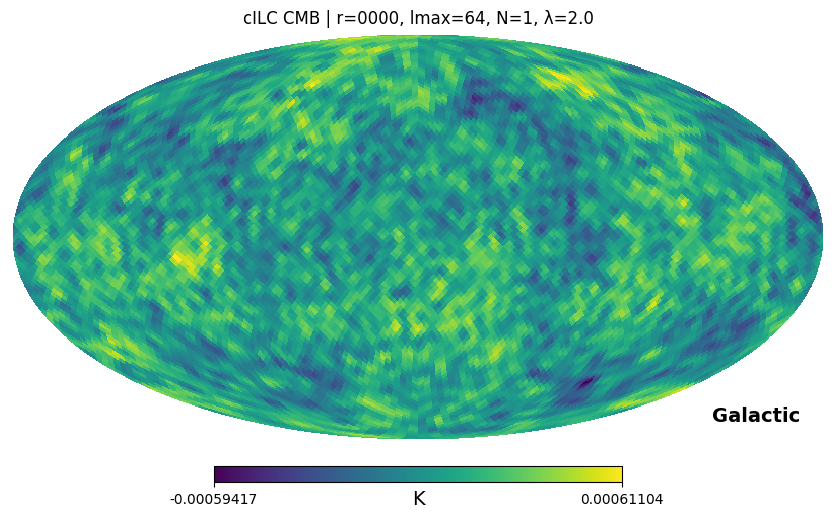

FINAL CHECK  F^T w == f  -> True


In [8]:
pipe.F_source = "empirical"  # "empirical" or "theory"
pipe.F_kwargs = {
    "base_dir": os.path.join(pipe.directory, "CMB_realisations"),
    "frequencies": pipe.frequencies,
    "realization": pipe.start_realisation,
    "normalize": True,
    "mask_path": "",
    "file_templates": {
        "cmb": "cmb_r{realisation:04d}.fits",
        "sync": "sync_f{frequency}.fits", 
        "tsz":  "tsz_f{frequency}.fits",
    },
}
pipe.step_ilc()

In [17]:
import os, glob
import numpy as np

lmax = 128
# --- build the saved filename exactly like the pipeline does ---
extract_comp = pipe.ilc_components[0]         # e.g. "cmb"
component    = pipe.wavelet_components[0]     # e.g. "cfn"
freq_tag     = "_".join(map(str, pipe.frequencies))
realisation  = int(pipe.start_realisation) 
lmax         = int(pipe.lmax)
lam_str      = str(getattr(pipe, "lam", 2.0)) # filenames use string "2.0"

base = os.path.join(pipe.directory, "SILC", "ilc_synthesised_maps")
path = os.path.join(
    base,
    f"{extract_comp}_from-{component}_f{freq_tag}_r{realisation:04d}_lmax{lmax}_lam{lam_str}.npy"
)

# fallback: if lam string differs (e.g. "2" vs "2.0"), try a glob
if not os.path.exists(path):
    cand = glob.glob(os.path.join(
        base,
        f"{extract_comp}_from-{component}_f{freq_tag}_r{realisation:04d}_lmax{lmax}_lam*.npy"
    ))
    if not cand:
        raise FileNotFoundError(f"ILC synth file not found:\n{path}")
    path = sorted(cand)[-1]
    print("Using closest match:", os.path.basename(path))

# --- load and compute mean ---
arr = np.load(path, mmap_mode="r")
arr = np.real(np.squeeze(arr))   # handle (1,H,W) and complex dtype
mean_val = float(np.nanmean(arr))

print("ILC synth file:", path)
print("Mean(ILC synth) =", mean_val)


ILC synth file: /Scratch/agnes/data/SILC/ilc_synthesised_maps/cmb_from-cfn_f030_044_070_100_143_217_353_545_857_r0000_lmax64_lam2.0.npy
Mean(ILC synth) = 0.00010641984491280786


! Check this (should be around 0)

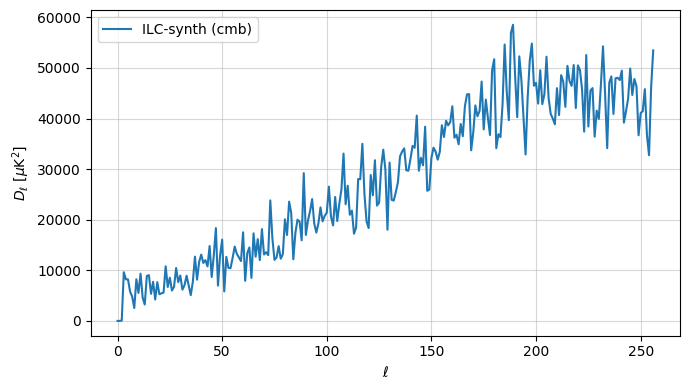

In [10]:
ell, cl = pipe.step_power_spec(
    unit="K",
    source="ilc_synth",
    component="cfn",                  
    extract_comp="cmb",
    frequencies=pipe.frequencies,      
    realisation=0,
    lmax=256,                          
    lam=2.0,                      
)

Checking Process: (it is bit messy right now)

[Per-band calibration] median R_ell = D_ell^ILC / D_ell^theory w ℓ∈[10,55] -> 7.593  (want ~1)
[After mono+dipole removal] median R_ell over ℓ∈[10,55] -> 7.593
[Scaling band] file: /Scratch/agnes/data/wavelet_transforms/scaling_coeffs/cfn_scaling_f030_r00000_lmax64_lam2.0.npy
  exists: True
  shape: (1, 1), min/max/mean: 9.267e-05+0.000e+00j/9.267e-05+0.000e+00j/9.267e-05+0.000e+00j


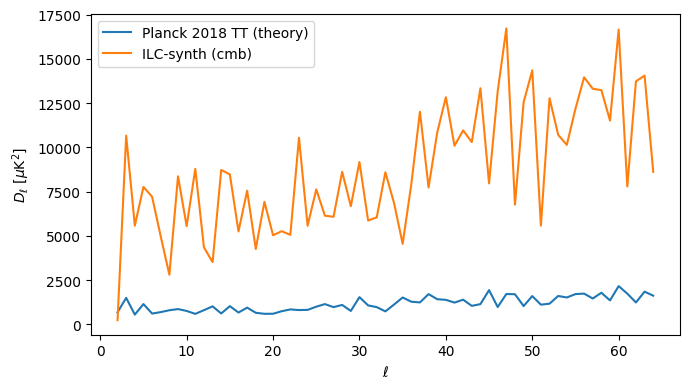

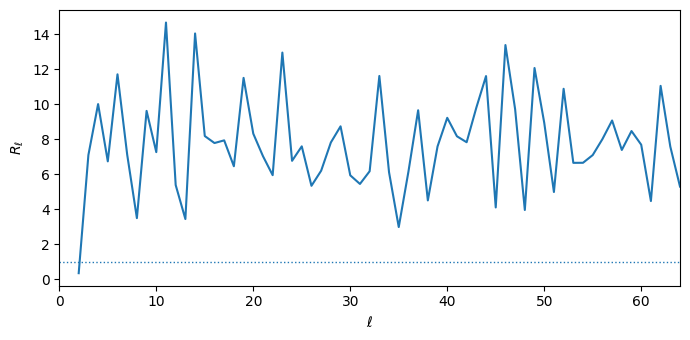

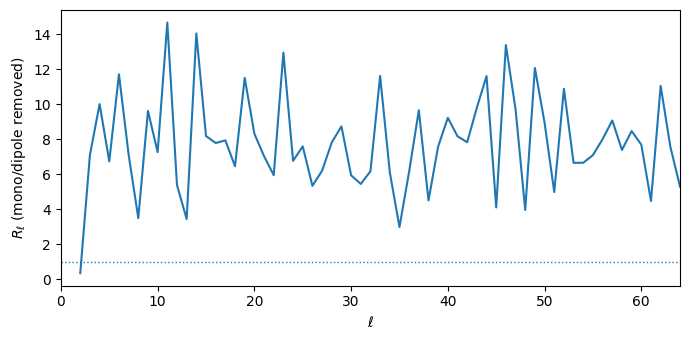

N_directions: 1 lmax: 64 lam: 2.0


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import s2fft 

# --- 0) Config from  pipeline object ---
r        = pipe.start_realisation
lmax_use = pipe.lmax
lam_str  = pipe.lam_str
freqs    = pipe.frequencies
comp_in  = pipe.wavelet_components[0] if pipe.wavelet_components else "cfn"
tgt      = pipe.ilc_components[0] if pipe.ilc_components else "cmb"

# --- 1) Theory D_ell (µK^2) ---
spec_path = os.path.join(pipe.directory, "cmb_spectrum.txt")
theory = np.loadtxt(spec_path)
ell_th = theory[:, 0].astype(int)
Dl_th  = theory[:, 1].astype(float)

# --- 2) Get ILC-synth alm via converter ---
ft   = FileTemplates(pipe.directory).file_templates
conv = MapAlmConverter(ft)
out  = conv.to_alm(
    component=comp_in, source="ilc_synth",
    extract_comp=tgt, frequencies=freqs,
    realisation=r, lmax=lmax_use, lam=lam_str,
)

# --- 3) Cl from ILC alms (K^2) -> D_ell (µK^2) ---
if out["format"] == "mw":
    ell_ilc, cl_ilc = PowerSpectrumTT.from_mw_alm(np.asarray(out["alm"]))
else:
    ell_ilc, cl_ilc = PowerSpectrumTT.from_healpy_alm(out["alm"])

Dl_ilc = PowerSpectrumTT.cl_to_Dl(ell_ilc, cl_ilc, input_unit="K")  # maps→alm→Cl are in K^2

# Align lengths
L   = min(Dl_ilc.size, Dl_th.size)
lax = np.arange(L)
rat = Dl_ilc[:L] / Dl_th[:L]

# Choose a mid-ℓ band for calibration diagnostics
lo   = max(10, 2)               # avoid very low-ℓ
hi   = min(L-10, L-1)
mid  = (lax >= lo) & (lax <= hi)
medR = float(np.nanmedian(rat[mid]))
print(f"[Per-band calibration] median R_ell = D_ell^ILC / D_ell^theory w ℓ∈[{lo},{hi}] -> {medR:.3f}  (want ~1)")

# --- 4) Remove mono/dipole from ILC map and re-check low-ℓ ---
# Build a HEALPix alm for map synthesis if needed
if out["format"] == "mw":

    hp_alm = SamplingConverters.mw_alm_2_hp_alm(out["alm"], lmax=out["lmax"])
else:
    hp_alm = out["alm"]

# pick an nside approximately matching your analysis
nside_guess = 2048 if (3*2048-1) >= out["lmax"] else 1024
m_ilc = hp.alm2map(hp_alm, nside=nside_guess, lmax=out["lmax"], verbose=False)

# SIMPLER: one call; returns 3 values (map, fitted monopole, fitted dipole vector)
m_ilc, mono_fit, dip_vec = hp.remove_dipole(m_ilc, fitval=True)

# recompute Cl/Dl after mono+dipole removal
cl0 = hp.alm2cl(hp.map2alm(m_ilc, lmax=out["lmax"], iter=0))
Dl0 = PowerSpectrumTT.cl_to_Dl(np.arange(cl0.size), cl0, input_unit="K")

# align lengths safely for the "after" ratio
L0   = min(Dl0.size, Dl_th.size)
lax0 = np.arange(L0)
rat0 = Dl0[:L0] / Dl_th[:L0]
lo0  = max(10, 2)
hi0  = min(L0-10, L0-1)
mid0 = (lax0 >= lo0) & (lax0 <= hi0)
medR0 = float(np.nanmedian(rat0[mid0]))
print(f"[After mono+dipole removal] median R_ell over ℓ∈[{lo0},{hi0}] -> {medR0:.3f}")
# print("monopole(K):", mono_fit, "dipole_vec(K):", dip_vec)

# --- 5) Scaling-band presence/health check ---
fk = "f_scal" if "f_scal" in ft else ("scaling_coeffs" if "scaling_coeffs" in ft else None)
if fk:
    fmt = ft[fk]
    try:
        path_scal = fmt.format(
            comp=comp_in,
            frequency=(freqs[0] if isinstance(freqs, (list, tuple)) else (freqs if freqs is not None else "")),
            realisation=int(r), lmax=int(lmax_use), lam=str(lam_str),
        )
    except KeyError:
        path_scal = fmt.format(comp=comp_in, realisation=int(r), lmax=int(lmax_use), lam=str(lam_str))

    exists = os.path.exists(path_scal)
    print(f"[Scaling band] file: {path_scal}\n  exists: {exists}")
    if exists:
        f_scal = np.load(path_scal)
        print(f"  shape: {f_scal.shape}, min/max/mean: {f_scal.min():.3e}/{f_scal.max():.3e}/{f_scal.mean():.3e}")
else:
    print("[Scaling band] No scaling-coeff template key ('f_scal' or 'scaling_coeffs') found in FileTemplates.")

# --- 6) Plots: overlay + ratio ---
plt.figure(figsize=(7,4))
plt.plot(lax[2:], Dl_th[:L][2:], label="Planck 2018 TT (theory)")
plt.plot(lax[2:], Dl_ilc[:L][2:], label=f"ILC-synth ({tgt})")
plt.xlabel(r"$\ell$"); plt.ylabel(r"$D_\ell\ [\mu\mathrm{K}^2]$"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(7,3.5))
plt.plot(lax[2:], rat[2:], label="ratio ILC/theory")
plt.axhline(1.0, ls=":", lw=1)
plt.xlim(0, L-1)
plt.xlabel(r"$\ell$"); plt.ylabel(r"$R_\ell$")
plt.tight_layout(); plt.show()

plt.figure(figsize=(7,3.5))
plt.plot(lax0[2:], rat0[2:], label="ratio after mono+dipole removal")
plt.axhline(1.0, ls=":", lw=1)
plt.xlim(0, L0-1)
plt.xlabel(r"$\ell$"); plt.ylabel(r"$R_\ell$ (mono/dipole removed)")
plt.tight_layout(); plt.show()

# --- 7) Directionality metadata (informational) ---
try:
    print("N_directions:", pipe.N_directions, "lmax:", pipe.lmax, "lam:", pipe.lam_str)
except Exception:
    pass

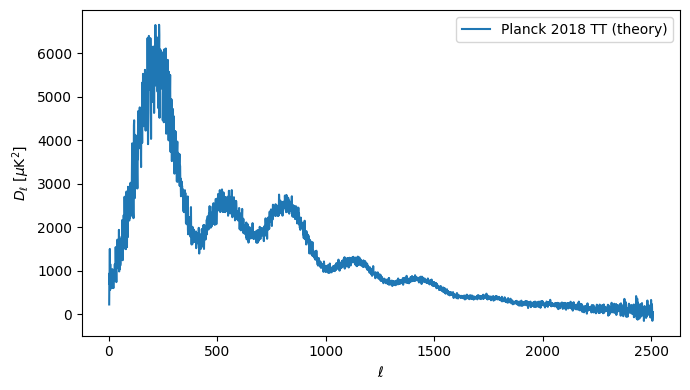

In [12]:
# Plot Planck 2018 best-fit TT theory (D_ell in µK^2) from cmb_spectrum.txt

import os
import numpy as np
import matplotlib.pyplot as plt

# 1) Point to the folder that contains cmb_spectrum.txt

data_dir = pipe.directory

path = os.path.join(data_dir, "cmb_spectrum.txt")

# 2) Load (format: ell, Dl, 0, 0)
data = np.loadtxt(path)
ell = data[:, 0].astype(int)
Dl  = data[:, 1].astype(float)  # µK^2

# 3) Plot
plt.figure(figsize=(7, 4))
plt.plot(ell, Dl, '-', label="Planck 2018 TT (theory)")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell\ [\mu\mathrm{K}^2]$")
plt.legend()
plt.tight_layout()
plt.show()


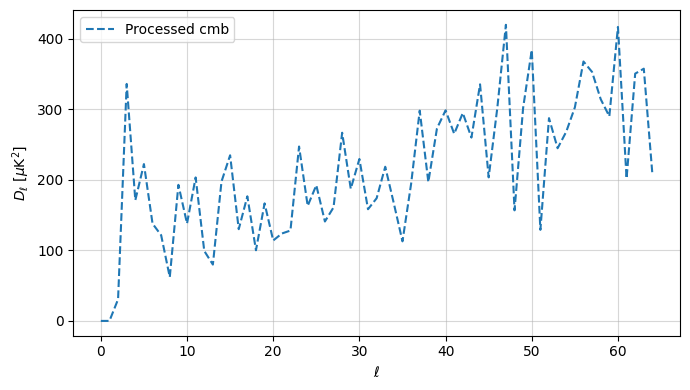

[ratio] ℓ-band = [2, 64], N=63 valid
[ratio] median R_ell = D_proc / D_input = 0.194


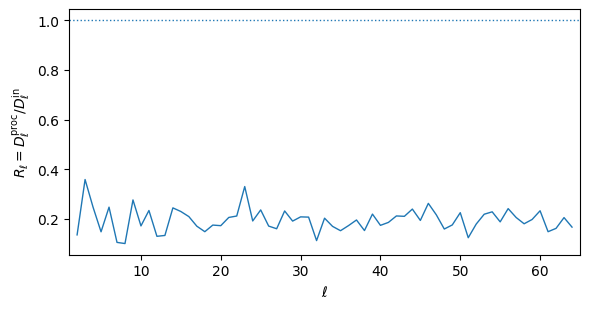

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

def ratio_processed_vs_input_2_64(pipe, component="cmb", realisation=0, theory_path=None):
    """
    Compute R_ell = Dl_processed / Dl_input for ell in [2, 64].

    processed: pipe.step_power_spec(unit="K", source="processed", ...) -> (ell, Cl[K^2])
    input/theory file: cmb_spectrum.txt with columns [ell, Dl(µK^2), ...]
    """
    # --- 1) processed spectrum (Cl in K^2) -> Dl in µK^2
    ell_p, Cl_p = pipe.step_power_spec(
        unit="K",
        source="processed",
        component=component,
        realisation=realisation,
        lmax=64,
    )
    ell_p = ell_p.astype(int)
    Dl_p = np.zeros_like(Cl_p, dtype=float)
    m = ell_p >= 2
    Dl_p[m] = ell_p[m] * (ell_p[m] + 1) / (2 * np.pi) * Cl_p[m] * 1e12  # K^2 -> µK^2

    # --- 2) load theory Dl (µK^2) from file (ignore extra columns)
    if theory_path is None:
        theory_path = os.path.join(pipe.directory, "cmb_spectrum.txt")
    arr = np.loadtxt(theory_path)  # expects at least 2 columns
    ell_th = arr[:, 0].astype(int)
    Dl_th  = arr[:, 1].astype(float)  # already µK^2

    # --- 3) build common ℓ list in [2,64]
    Dl_p_map  = {int(L): v for L, v in zip(ell_p,  Dl_p)}
    Dl_th_map = {int(L): v for L, v in zip(ell_th, Dl_th)}
    ell_common = np.array([L for L in range(2, 65) if L in Dl_p_map and L in Dl_th_map], dtype=int)
    if ell_common.size == 0:
        raise RuntimeError("No overlapping ℓ between processed and theory in [2,64].")

    Dl_p_band  = np.array([Dl_p_map[L]  for L in ell_common], dtype=float)
    Dl_th_band = np.array([Dl_th_map[L] for L in ell_common], dtype=float)

    # --- 4) ratio (safe)
    ratio = np.full_like(Dl_p_band, np.nan, dtype=float)
    valid = Dl_th_band > 0
    ratio[valid] = Dl_p_band[valid] / Dl_th_band[valid]

    # --- 5) report + plot
    medR = float(np.nanmedian(ratio))
    print(f"[ratio] ℓ-band = [{ell_common.min()}, {ell_common.max()}], N={valid.sum()} valid")
    print(f"[ratio] median R_ell = D_proc / D_input = {medR:.3f}")

    plt.figure(figsize=(6,3.2))
    plt.plot(ell_common, ratio, lw=1)
    plt.axhline(1.0, ls=":", lw=1)
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$R_\ell = D_\ell^{\rm proc}/D_\ell^{\rm in}$")
    plt.xlim(1, 65)
    plt.tight_layout(); plt.show()

    return ell_common, ratio, medR

# --- run it ---
ell_band, R_band, medR = ratio_processed_vs_input_2_64(
    pipe,
    component="cmb",
    realisation=0,
    theory_path=os.path.join(pipe.directory, "cmb_spectrum.txt"),
)


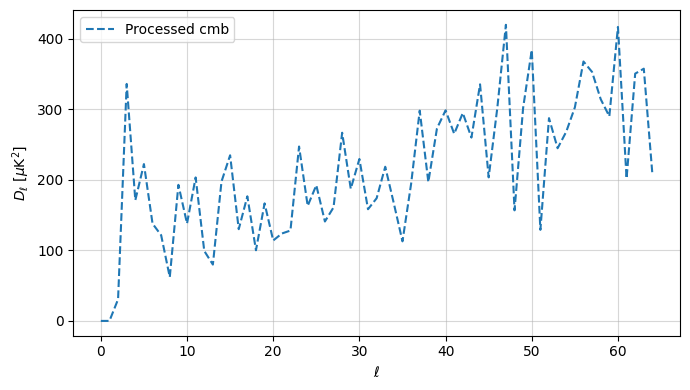

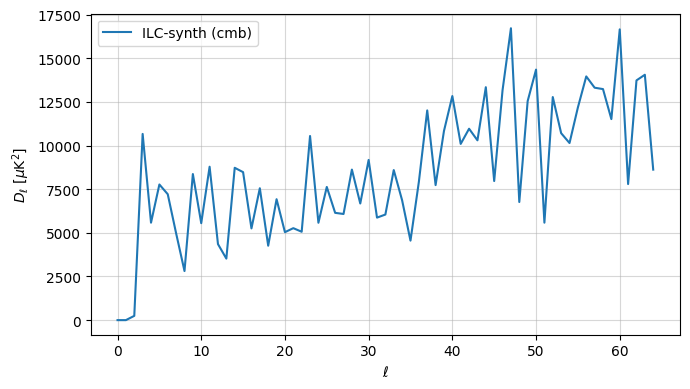

[processed / ILC_synth] ℓ-band = [2, 64], N=63 valid
[processed / ILC_synth] median R_ell = 0.025


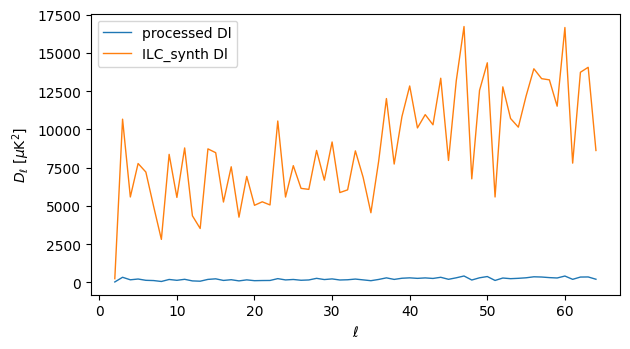

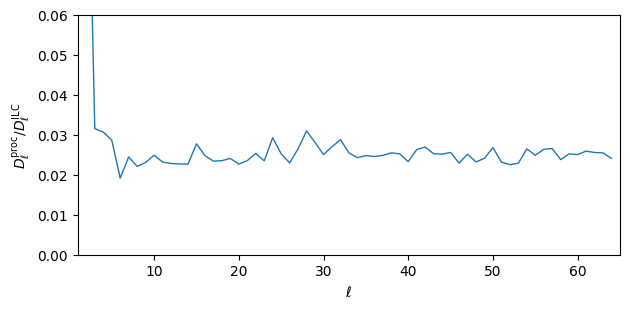

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cl_to_Dl(ell, Cl):
    Dl = np.zeros_like(Cl, dtype=float)
    m = ell >= 2
    Dl[m] = ell[m]*(ell[m]+1)/(2*np.pi) * Cl[m] * 1e12  # K^2 -> µK^2
    return Dl

def ratio_processed_vs_ilc_synth(pipe, realisation=0, lmax=64, lam=2.0):
    # --- processed spectrum (Cl[K^2]) -> Dl[µK^2]
    ell_p, Cl_p = pipe.step_power_spec(
        unit="K",
        source="processed",
        component="cmb",          # processed CMB component
        realisation=realisation,
        lmax=lmax,
    )
    ell_p = ell_p.astype(int)
    Dl_p = cl_to_Dl(ell_p, Cl_p)

    # --- ILC_synth spectrum (Cl[K^2]) -> Dl[µK^2]
    ell_i, Cl_i = pipe.step_power_spec(
        unit="K",
        source="ilc_synth",
        component="cfn",          # CFN cube as input
        extract_comp="cmb",       # extract the CMB
        frequencies=pipe.frequencies,
        realisation=realisation,
        lmax=lmax,
        lam=lam,
    )
    ell_i = ell_i.astype(int)
    Dl_i = cl_to_Dl(ell_i, Cl_i)

    # --- common ℓ in [2, lmax]
    LMIN, LMAX = 2, int(lmax)
    common = np.intersect1d(ell_p, ell_i)
    ell_band = common[(common >= LMIN) & (common <= LMAX)]
    if ell_band.size == 0:
        raise RuntimeError("No overlapping ℓ in [2, lmax] between processed and ILC_synth.")

    # index maps
    idx_p = {int(L): k for k, L in enumerate(ell_p)}
    idx_i = {int(L): k for k, L in enumerate(ell_i)}

    Dl_p_band = np.array([Dl_p[idx_p[L]] for L in ell_band], dtype=float)
    Dl_i_band = np.array([Dl_i[idx_i[L]] for L in ell_band], dtype=float)

    # --- ratio (safe)
    ratio = np.full_like(Dl_p_band, np.nan, dtype=float)
    valid = Dl_i_band > 0
    ratio[valid] = Dl_p_band[valid] / Dl_i_band[valid]

    # --- report + plots
    medR = float(np.nanmedian(ratio))
    print(f"[processed / ILC_synth] ℓ-band = [{ell_band.min()}, {ell_band.max()}], "
          f"N={int(np.isfinite(ratio).sum())} valid")
    print(f"[processed / ILC_synth] median R_ell = {medR:.3f}")

    # Optional: overlay spectra
    plt.figure(figsize=(6.4,3.6))
    plt.plot(ell_band, Dl_p_band, label="processed Dl", lw=1)
    plt.plot(ell_band, Dl_i_band, label="ILC_synth Dl", lw=1)
    plt.xlabel(r"$\ell$"); plt.ylabel(r"$D_\ell\ [\mu \mathrm{K}^2]$")
    plt.legend(); plt.tight_layout(); plt.show()

    # Ratio plot
    plt.figure(figsize=(6.4,3.2))
    plt.plot(ell_band, ratio, lw=1)
    plt.axhline(1.0, ls=":", lw=1)
    plt.xlabel(r"$\ell$"); plt.ylabel(r"$D_\ell^{\rm proc} / D_\ell^{\rm ILC}$")
    plt.xlim(LMIN-1, LMAX+1)
    plt.ylim(0,0.06)
    plt.tight_layout(); plt.show()

    return ell_band, ratio, medR

# --- run it ---
ell_band, R_band, medR = ratio_processed_vs_ilc_synth(pipe, realisation=0, lmax=64, lam=2.0)


this is not right, could it be aliasing due to low lmax? try high lmax 

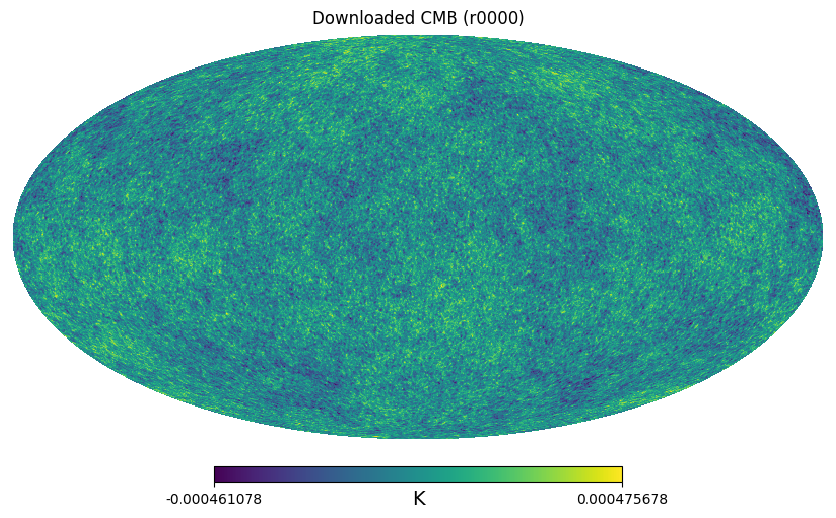

Shown: /Scratch/agnes/data/CMB_realisations/cmb_r0000.fits


In [15]:
import os
import healpy as hp
import matplotlib.pyplot as plt

path = FileTemplates(pipe.directory).file_templates["cmb"].format(realisation=0)

m = hp.read_map(path, field=0, dtype=float)  # I (temperature) only
hp.mollview(m, title="Downloaded CMB (r0000)", unit="K")
plt.show()

print("Shown:", path)

In [16]:
import numpy as np
import healpy as hp

# Use valid pixels
valid = np.isfinite(m) & (m != hp.UNSEEN)
mean_K = float(np.mean(m[valid]))
print(f"Mean = {mean_K:.6e} K  ({mean_K*1e6:.2f} µK);  used {valid.sum()}/{m.size} pixels")

# (Optional) cross-check via a_00:
a00 = hp.map2alm(m, lmax=0, iter=0)[0].real
mean_from_a00 = a00 / np.sqrt(4*np.pi)
print(f"a_00-derived mean = {mean_from_a00:.6e} K  (Δ={mean_K-mean_from_a00:+.3e} K)")


Mean = 8.525747e-13 K  (0.00 µK);  used 50331648/50331648 pixels
a_00-derived mean = 8.525747e-13 K  (Δ=+4.420e-21 K)
